# quick demo of `hodalpt.sims.alpt` module

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from hodalpt.sims import alpt as CS

# run CS to generate ALPT DM

In [2]:
#fconfig = '/Users/ch54662/projects/CosmicSignal4SimBIG/boxes/config_file.ini'
# ic_path = '/Users/ch54662/Library/CloudStorage/Box-Box/simbig/quijote/latin_hypercube_HR/0/ICs/'
# outdir = '/Users/ch54662/Library/CloudStorage/Box-Box/simbig/quijote/latin_hypercube_HR/0/alpt/'
ic_path = '/Users/mcc3842/CosmicSim2025/data/quijote/latin_hypercube_HR/100/ICs/'
outdir = '/Users/mcc3842/CosmicSim2025/data/quijote/latin_hypercube_HR/100/alpt/'

In [3]:
xyz0 = CS.CSbox_alpt(ic_path, outdir, seed=0, dgrowth_short=5., make_ics=False, subgrid=False, silent=False)

Computing displacement fields at z=0.5
Compiled with MULTITHREAD support, with 10 threads
 >>> web-on: initialising settings....

---> attention: N1= 256
---> attention: redshift= 0.5


 >>> starting web-on  ...

 >>> web-on initialising cosmological model....

number of chosen redshift snapshots = 1
... writing file posx.dat
... writing file posy.dat
... writing file posz.dat
... writing file posorx.dat
... writing file posory.dat
... writing file posorz.dat
... writing file posor0x.dat
... writing file posor0y.dat
... writing file posor0z.dat
... reading file Quijote_ICs_delta_z127_n256_CIC.DAT
... writing file deltaICOM0.313OL0.687G256V1000.0.dat
... writing file auxreal.dat
... writing file auxim.dat
 >>> dump power-spectrum in : pk_deltaICOM0.313OL0.687G256V1000.0.dat
-->  sample velocity;  z_min, z_max: 0.5  0.5 
... writing file VEZELDx.dat
... writing file VEZELDy.dat
... writing file VEZELDz.dat
-->  calculate values for: 1 snapshots
redshift=0.5, growth=0.769396
... reading f

In [4]:
xyz = CS.CSbox_alpt(ic_path, outdir, seed=0, dgrowth_short=5., make_ics=False, subgrid=True, silent=False)

Computing displacement fields at z=0.5
Compiled with MULTITHREAD support, with 10 threads
 >>> web-on: initialising settings....

---> attention: N1= 256
---> attention: redshift= 0.5


 >>> starting web-on  ...

 >>> web-on initialising cosmological model....

number of chosen redshift snapshots = 1
... writing file posx.dat
... writing file posy.dat
... writing file posz.dat
... writing file posorx.dat
... writing file posory.dat
... writing file posorz.dat
... writing file posor0x.dat
... writing file posor0y.dat
... writing file posor0z.dat
... reading file Quijote_ICs_delta_z127_n256_CIC.DAT
... writing file deltaICOM0.313OL0.687G256V1000.0.dat
... writing file auxreal.dat
... writing file auxim.dat
 >>> dump power-spectrum in : pk_deltaICOM0.313OL0.687G256V1000.0.dat
-->  sample velocity;  z_min, z_max: 0.5  0.5 
... writing file VEZELDx.dat
... writing file VEZELDy.dat
... writing file VEZELDz.dat
-->  calculate values for: 1 snapshots
redshift=0.5, growth=0.769396
... reading f

(-100.0, 1100.0)

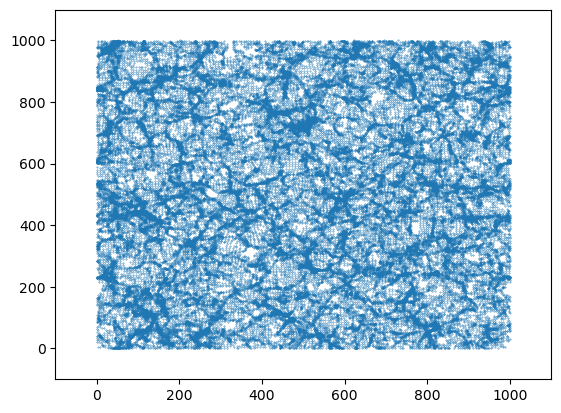

In [5]:
x, y, z = xyz0.T
zslice = (z > 100) & (z < 105)
plt.scatter(x[zslice], y[zslice], s=0.1)
plt.xlim(-100, 1100)
plt.ylim(-100, 1100)

(-100.0, 1100.0)

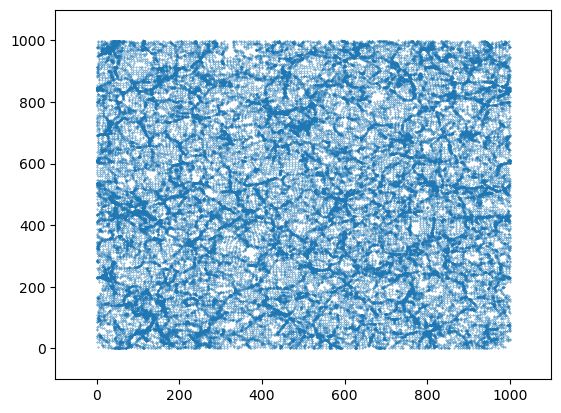

In [6]:
x, y, z = xyz.T
zslice = (z > 100) & (z < 105)
plt.scatter(x[zslice], y[zslice], s=0.1)
plt.xlim(-100, 1100)
plt.ylim(-100, 1100)

# run CS bias model

First local bias model

In [7]:
# arbitrary parameters
theta_gal = {
    'alpha': 1.9230, 
    'beta': 2.0253, 
    'dth': -0.7889, 
    'rhoeps': 14.6874, 
    'eps': 0.5616, 
    'nmean': 3.3e-4, 
    'rhoepsprime': 0., 
    'epsprime': 0.}
theta_rsd = {
    'bv': 0.7289, 
    'bb': 1.1652,
    'betarsd': 1.3136, 
    'gamma': 0.4944}

In [8]:
xyz_g0 = CS.CSbox_galaxy(theta_gal, theta_rsd, outdir, bias_model='local', subgrid=False, silent=False)

OM0.313OL0.687G256V1000.0_ALPTrs5.000z0.500.dat
Omega_m 0.313000
reading /Users/mcc3842/CosmicSim2025/data/quijote/latin_hypercube_HR/100/alpt/BOXpos*OM0.313OL0.687G256V1000.0_ALPTrs5.000z0.500.dat
Reading input ...
Getting number counts via parametric bias ...


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Number counts diagnostics (min, max, mean):  0.0 13.0 0.01963651180267334
Preparing galaxy positions ...
Sampling galaxy positions ...
-->Find starting indices ...
-->Start loop over cells of the mesh ...
apply RSD ...


In [9]:
xyz_g1 = CS.CSbox_galaxy(theta_gal, theta_rsd, outdir, bias_model='local', subgrid=True, silent=False)

OM0.313OL0.687G256V1000.0_ALPTrs5.000z0.500.dat
Omega_m 0.313000
reading /Users/mcc3842/CosmicSim2025/data/quijote/latin_hypercube_HR/100/alpt/super_BOXpos*OM0.313OL0.687G256V1000.0_ALPTrs5.000z0.500.dat
Reading input ...
Getting number counts via parametric bias ...
Number counts diagnostics (min, max, mean):  0.0 27.0 0.019726932048797607
Preparing galaxy positions ...
Sampling galaxy positions ...
-->Find starting indices ...
-->Start loop over cells of the mesh ...
apply RSD ...


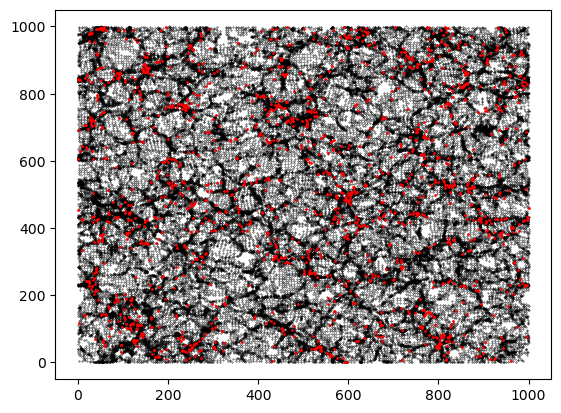

In [10]:
x, y, z = xyz0.T
zslice = (z > 100) & (z < 105)
plt.scatter(x[zslice], y[zslice], s=0.1, c='k')

x0, y0, z0 = xyz_g0.T
zslice0 = (z0 > 100) & (z0 < 105)
plt.scatter(x0[zslice0], y0[zslice0], s=1, c='r')
plt.savefig('test0.png', bbox_inches='tight') 

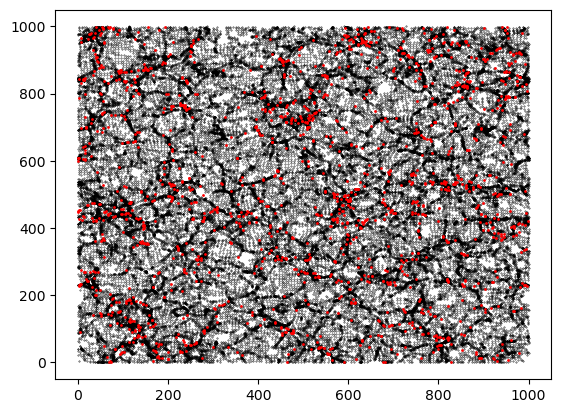

In [11]:
x, y, z = xyz.T
zslice = (z > 100) & (z < 105)
plt.scatter(x[zslice], y[zslice], s=0.1, c='k')

x0, y0, z0 = xyz_g1.T
zslice0 = (z0 > 100) & (z0 < 105)
plt.scatter(x0[zslice0], y0[zslice0], s=1, c='r')
plt.savefig('test1.png', bbox_inches='tight') 

## non-local bias

In [12]:
# arbitrary parameters
theta_gal = {
    'alpha': np.repeat(1.9230, 16).reshape((4, 4)),  
    'beta': np.repeat(2.0253, 16).reshape((4, 4)), 
    'dth': np.repeat(-0.7889, 16).reshape((4, 4)),
    'rhoeps': np.repeat(14.6874, 16).reshape((4, 4)), 
    'eps': np.repeat(0.5616, 16).reshape((4, 4)),  
    'nmean': np.repeat(3.3e-4, 16).reshape((4, 4))
}
theta_rsd = {
    'bv': 0.7289, 
    'bb': 1.1652,
    'betarsd': 1.3136, 
    'gamma': 0.4944}

In [13]:
xyz_g = CS.CSbox_galaxy(theta_gal, theta_rsd, outdir, bias_model='nonlocal0', subgrid=True, silent=False)

OM0.313OL0.687G256V1000.0_ALPTrs5.000z0.500.dat
Omega_m 0.313000
reading /Users/mcc3842/CosmicSim2025/data/quijote/latin_hypercube_HR/100/alpt/super_BOXpos*OM0.313OL0.687G256V1000.0_ALPTrs5.000z0.500.dat
Reading input ...
Getting number counts via parametric bias ...
Number counts diagnostics (min, max, mean):  0.0 48653.0 0.47436827421188354
Preparing galaxy positions ...
Sampling galaxy positions ...
-->Find starting indices ...
-->Start loop over cells of the mesh ...
apply RSD ...


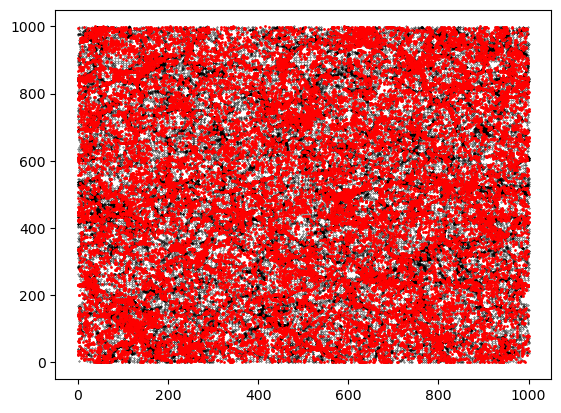

In [14]:
x, y, z = xyz.T
zslice = (z > 100) & (z < 105)
plt.scatter(x[zslice], y[zslice], s=0.1, c='k')

x0, y0, z0 = xyz_g.T
zslice0 = (z0 > 100) & (z0 < 105)
plt.scatter(x0[zslice0], y0[zslice0], s=1, c='r')
plt.savefig('test2.png', bbox_inches='tight') 